<a href="https://colab.research.google.com/github/mathieu34/Kaggle_Predict-Future-Sales/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive 

In [ ]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/drive/folders/16wg-vm82LYtgg-_08QIP0FKGwC5T0moy?usp=sharing"

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':"1Qzvih4qgh-9ekKfSHD9kpeeSOvl-Kim9"})  
downloaded = drive.CreateFile({'id':"1Yq8mNPA88axRynj2SoXcoq8RR60LWRTI"}) 
downloaded = drive.CreateFile({'id':"1RA20ApkK0IVqK14RSd5xxhb7I_GaO6W_"}) 
downloaded = drive.CreateFile({'id':"1Wni3GiUJgKufvg0i1Jwvu-keWgsyv2e7"}) 
downloaded = drive.CreateFile({'id':"1z1wwC6lwMsF9dFwCWah3K1DuGlxOrTlN"}) 
downloaded = drive.CreateFile({'id':"16K-Q2_FmKCzJCkcbKisWH3wPUvPlA1n7"}) 
downloaded.GetContentFile('items.csv')
downloaded.GetContentFile('item_categories.csv')  
downloaded.GetContentFile('shops.csv')
downloaded.GetContentFile('sales_train.csv.gz')
downloaded.GetContentFile('sample_submission.csv.gz')
downloaded.GetContentFile('test.csv.gz')

In [ ]:
import pandas as pd 
import numpy as np

link = "https://drive.google.com/drive/folders/16wg-vm82LYtgg-_08QIP0FKGwC5T0moy?usp=sharing"

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':"1z1wwC6lwMsF9dFwCWah3K1DuGlxOrTlN"})
downloaded.GetContentFile('sample_submission.csv.gz')
pd.read_csv('sample_submission.csv.gz') 


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


## Data leackage ? 

## Creation of the tuple shop/item ID on the train dataset

In [ ]:
train['tuple_id'] = train.shop_id.astype(str) + '_' + train.item_id.astype(str)
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,tuple_id
0,02.01.2013,0,59,22154,999.00,1.0,59_22154
1,03.01.2013,0,25,2552,899.00,1.0,25_2552
2,05.01.2013,0,25,2552,899.00,-1.0,25_2552
3,06.01.2013,0,25,2554,1709.05,1.0,25_2554
4,15.01.2013,0,25,2555,1099.00,1.0,25_2555
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,25_7409
2935845,09.10.2015,33,25,7460,299.00,1.0,25_7460
2935846,14.10.2015,33,25,7459,349.00,1.0,25_7459
2935847,22.10.2015,33,25,7440,299.00,1.0,25_7440


In [ ]:
test['tuple_id'] = test.shop_id.astype(str) + '_' + test.item_id.astype(str)
test 

,ID,shop_id,item_id,item_category_id_x,date_block_num,item_category_id_y,tuple_id
0,0,5,5037,19,34,19,5_5037
1,1,5,5320,55,34,55,5_5320
2,2,5,5233,19,34,19,5_5233
3,3,5,5232,23,34,23,5_5232
4,4,5,5268,20,34,20,5_5268
...,...,...,...,...,...,...,...
214195,214195,45,18454,55,34,55,45_18454
214196,214196,45,16188,64,34,64,45_16188
214197,214197,45,15757,55,34,55,45_15757
214198,214198,45,19648,40,34,40,45_19648


In [ ]:
train1 = pd.merge(train, test[["ID",'tuple_id']], on=['tuple_id'], how='inner')
train1.sort_values("ID")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,tuple_id,ID
896448,05.09.2015,32,5,5037,749.5,1.0,5_5037,0
896447,31.08.2015,31,5,5037,749.0,1.0,5_5037,0
896446,20.08.2015,31,5,5037,749.5,1.0,5_5037,0
896445,14.08.2015,31,5,5037,1499.0,1.0,5_5037,0
896444,05.07.2015,30,5,5037,1499.0,1.0,5_5037,0
...,...,...,...,...,...,...,...,...
234047,08.11.2013,10,45,15757,199.0,1.0,45_15757,214197
846090,11.07.2014,18,45,969,549.0,1.0,45_969,214199
846091,09.08.2014,19,45,969,549.0,1.0,45_969,214199
846088,22.06.2014,17,45,969,549.0,1.0,45_969,214199


In [ ]:
train1["ID"].nunique()
# we can see that there is less unique ID than in the test dataset. 

111404

## All Datasets 

In [ ]:
import pandas as pd 
import numpy as np

downloaded = drive.CreateFile({'id':"1Wni3GiUJgKufvg0i1Jwvu-keWgsyv2e7"})
downloaded.GetContentFile('sales_train.csv.gz')
sales = pd.read_csv('sales_train.csv.gz') 
 

# Aggregate Data to montly level is  done 
# Unique ID is not provide. 

In [ ]:
downloaded = drive.CreateFile({'id':"16K-Q2_FmKCzJCkcbKisWH3wPUvPlA1n7"})
downloaded.GetContentFile('test.csv.gz')
test = pd.read_csv('test.csv.gz') 

In [ ]:
downloaded = drive.CreateFile({'id':"1Qzvih4qgh-9ekKfSHD9kpeeSOvl-Kim9"})
downloaded.GetContentFile('items.csv')

items = pd.read_csv("items.csv")


In [ ]:
downloaded = drive.CreateFile({'id':"1Yq8mNPA88axRynj2SoXcoq8RR60LWRTI"})
downloaded.GetContentFile('item_categories.csv')
item_categories = pd.read_csv("item_categories.csv")

downloaded = drive.CreateFile({'id':"1RA20ApkK0IVqK14RSd5xxhb7I_GaO6W_"})
downloaded.GetContentFile('shops.csv')
shops = pd.read_csv("shops.csv")
items = pd.read_csv("items.csv")

print(items.head(3))
print(item_categories.head(3))
print(shops.head(3))
print(sales.head(3))

                                           item_name  item_id  item_category_id
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1  !ABBYY FineReader 12 Professional Edition Full...        1                76
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2                40
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
                       shop_name  shop_id
0  !Якутск Орджоникидзе, 56 фран        0
1  !Якутск ТЦ "Центральный" фран        1
2               Адыгея ТЦ "Мега"        2
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154       999.0           1.0
1  03.01.2013               0       25     2552       899.0           1.0
2  05.01.2013               0       25     2552       899.0          -1.0


# EDA
## https://www.kaggle.com/rhodiumbeng/predict-future-sales-eda

In [ ]:
# Examine the size & shape of the data
print(sales.shape, items.shape, item_categories.shape, shops.shape, test.shape)

(2935849, 6) (22170, 3) (84, 2) (60, 2) (214200, 6)


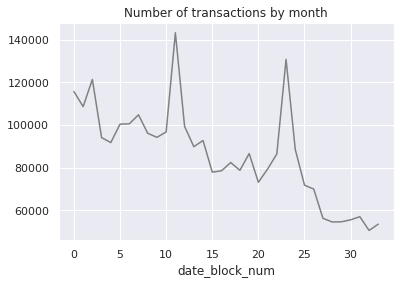

In [ ]:
import seaborn as sns

transactions = sales.groupby('date_block_num')['date'].count()
sns.set()
transactions.plot.line(title='Number of transactions by month', color='gray')


#Overall, the total number of transactions by month for all shops is on a downward trend.
#The two peaks correspond to the two year-end periods (Dec 2013 & Dec 2014) in the sales dataset.

Text(0.5, 1.0, 'Number of items with transactions')

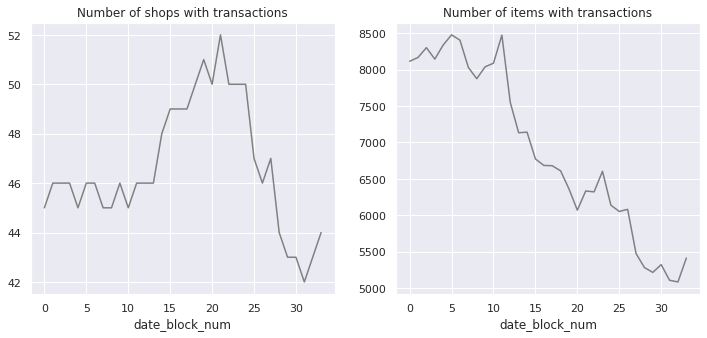

In [ ]:
import matplotlib.pyplot as plt

shop_counts = sales.groupby('date_block_num')['shop_id'].nunique()
item_counts = sales.groupby('date_block_num')['item_id'].nunique()


fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
shop_counts.plot.line(ax=axarr[0], color='gray')
item_counts.plot.line(ax=axarr[1], color='gray')
axarr[0].set_title('Number of shops with transactions')
axarr[1].set_title('Number of items with transactions')


In [ ]:
print(sales['item_id'].nunique(), sales['shop_id'].nunique())

#For the shops, the number corresponds to the total number of shops in the shops dataset. 
#However, for the items, the number is less than the total number of items (22,170) in the items dataset.
#Not all the shops has got transactions every month, and on the average only a third and less of the items have transactions every month.

21807 60


In [ ]:
test_shops = test['shop_id'].unique()
print(len(test_shops))
print(np.sort(test_shops))

# 12 shops do not feature in the test data. 

42
[ 2  3  4  5  6  7 10 12 14 15 16 18 19 21 22 24 25 26 28 31 34 35 36 37
 38 39 41 42 44 45 46 47 48 49 50 52 53 55 56 57 58 59]


In [ ]:
test_items = test['item_id'].unique()
print(len(test_items))



5100


In [ ]:
check = sales[np.isin(sales['item_id'], test_items, invert=True)]
print(len(check['item_id'].unique()))
print(np.sort(check['item_id'].unique()))

# 17,070 items in the sales data are not in the test data.

17070
[    0     1     2 ... 22165 22168 22169]


## Data leackage 
### https://www.kaggle.com/dimitreoliveira/model-stacking-feature-engineering-and-eda

In [ ]:
 ## I'll only be using only the "shop_id" and "item_id" that appear on the test set.

test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()
# Only shops that exist in test set.
train = sales[sales['shop_id'].isin(test_shop_ids)]
# Only items that exist in test set.
train = train[sales['item_id'].isin(test_item_ids)]
len(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1224439

In [ ]:
train = train.merge(items[['item_id', 'item_category_id']], on = ['item_id'], how = 'left')
test = test.merge(items[['item_id', 'item_category_id']], on = ['item_id'], how = 'left')

In [ ]:
print(test["item_id"].nunique())
print(items["item_id"].nunique())
print(test["shop_id"].nunique())
print(len(test))

5100
22170
42
214200


In [ ]:
print(5100*42)
# exactly the number of rows in the test dataset. In the test, almost of the pairs have probably 0 in their prediction. 

214200


## Data cleaning

In [ ]:
train = train.query('item_price > 0') # keep only rows when item_price>0.

### EDA : aggregate on train dataset

In [ ]:
import numpy as np
from itertools import product
import gc
from tqdm import tqdm_notebook
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float32`
                `int64`   type to `int32`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int32)
    
    return df

In [ ]:
# from itertools import product

# # Agregate datas

# # For every month we create a grid from all shops/items combinations from that month. 
# # In effect, to mimic the real behavior of the data we have to create the missing records from the loaded dataset
grid = []

for block_num in train['date_block_num'].unique():
  cur_shops = train[train['date_block_num']==block_num]['shop_id'].unique()
  cur_items = train[train['date_block_num']==block_num]['item_id'].unique()
  grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

# #turn the grid into pandas dataframe

index_cols = ['shop_id', 'item_id', 'date_block_num']
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)
train['item_cnt_day'] = train['item_cnt_day'].clip(0,20)  #.clip(0,20)

gb_cnt = train.groupby(index_cols)['item_cnt_day'].agg(['sum']).reset_index().rename(columns = {'sum': 'item_cnt_month'})
gb_cnt['item_cnt_month'] = gb_cnt['item_cnt_month'].clip(0,20).astype(np.int)  #.clip(0,20).astype(np.int)

# #join aggregated data to the grid

all_data = pd.merge(grid,gb_cnt,how='left',on=index_cols).fillna(0)
all_data['item_cnt_month'] = all_data['item_cnt_month'].astype(int)
all_data = downcast_dtypes(all_data)


In [ ]:
# Same as above but with shop-month aggregates
gb = train.groupby(['shop_id', 'item_id', 'date_block_num']).item_price.agg(['mean']).rename(columns={'mean': 'shop_item_price'}).reset_index()
all_data = pd.merge(all_data, gb, how='left', on=['shop_id', 'item_id', 'date_block_num']).fillna(0)


all_data = downcast_dtypes(all_data)
del gb 
gc.collect();

In [ ]:
# Same as above but with item-shop-month aggregates
gb = train.groupby(['item_id', 'date_block_num']).item_price.agg(['mean']).rename(columns={'mean': 'it_price'}).reset_index()
all_data = pd.merge(all_data, gb, how='left', on=['item_id', 'date_block_num']).fillna(0)

all_data = downcast_dtypes(all_data)
del gb 
gc.collect();

In [ ]:
final_train_target = pd.merge(train, all_data[['item_id', "shop_id", 'date_block_num', "item_cnt_month"]], how='inner', on=['item_id', "shop_id", 'date_block_num'])


In [ ]:
# rajouter "target sur le final_train"

# Same as above but with item-month aggregates
gb = final_train_target.groupby(['item_id', 'date_block_num']).item_cnt_month.agg(['mean']).rename(columns={'mean': 'item_sales'}).reset_index()
all_data = pd.merge(all_data, gb, how='left', on=['item_id', 'date_block_num']).fillna(0)

# #sort the data

all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

del gb 
gc.collect();

In [ ]:
all_data = pd.merge(items[['item_id', "item_category_id"]], all_data, how='inner', on=['item_id'])

In [ ]:
# Same as above but with category_month aggregates
gb = final_train_target.groupby(["item_category_id",'date_block_num']).item_cnt_month.agg(['mean']).rename(columns={'mean': 'item_sales_by_category'}).reset_index()
all_data = pd.merge(all_data, gb, how='left', on=["item_category_id",'date_block_num']).fillna(0)

del gb 
gc.collect();

In [ ]:
print(all_data.columns)
print(all_data.isnull().sum())

Index(['item_id', 'item_category_id', 'shop_id', 'date_block_num',
       'item_cnt_month', 'shop_item_price', 'it_price', 'item_sales',
       'item_sales_by_category'],
      dtype='object')
item_id                   0
item_category_id          0
shop_id                   0
date_block_num            0
item_cnt_month            0
shop_item_price           0
it_price                  0
item_sales                0
item_sales_by_category    0
dtype: int64


In [ ]:
all_data['item_cnt_month'].describe()

count    2.731818e+06
mean     5.921957e-01
std      5.408006e+00
min     -4.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.253000e+03
Name: item_cnt_month, dtype: float64

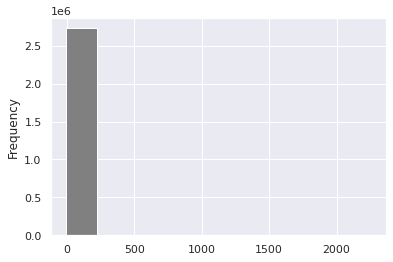

In [ ]:
all_data['item_cnt_month'].plot.hist(color='gray')



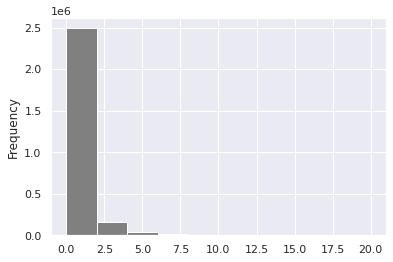

In [ ]:
all_data['item_cnt_month'] = np.clip(all_data['item_cnt_month'], 0, 20)
all_data['item_cnt_month'].plot.hist(color='gray')

#most of 'item_cnt_month' are 0. So we are scaling with the clip. 

In [ ]:
# Extract time based features.
all_data['year'] = all_data['date_block_num'].apply(lambda x: ((x//12) + 2013))
all_data['month'] = all_data['date_block_num'].apply(lambda x: (x % 12))



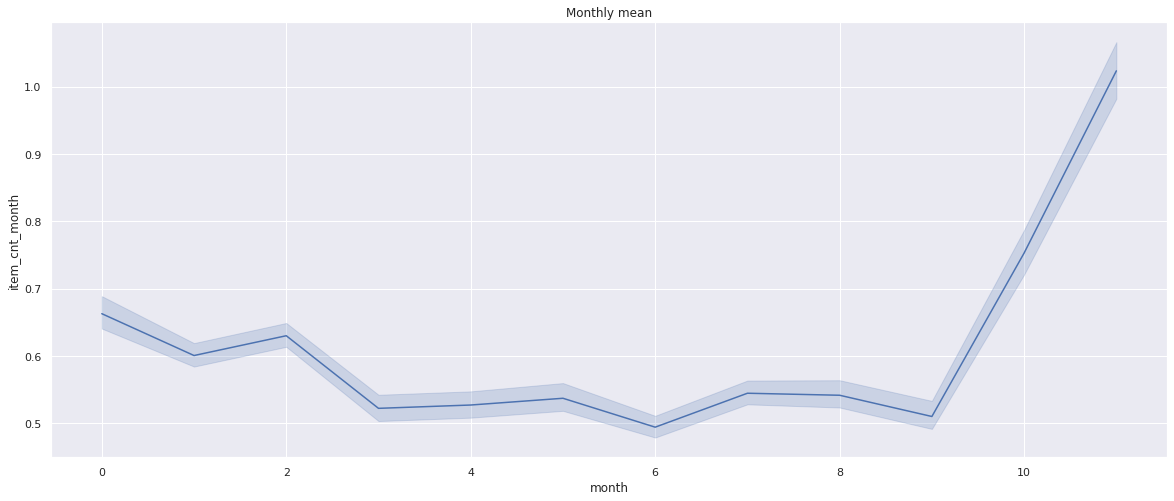

In [ ]:
%matplotlib inline 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns


plt.figure(figsize=(20,8))
sns.lineplot(x="month", y="item_cnt_month", data=all_data).set_title("Monthly mean")
plt.show()

# trending increase of item sales count at the end of the year. 

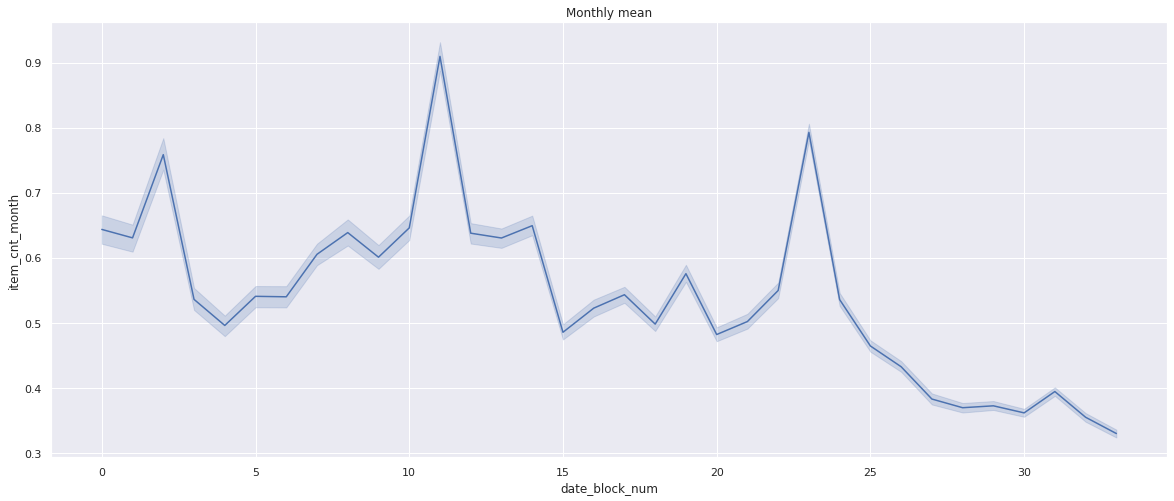

In [ ]:
#gb_cnt = train.groupby(index_cols)['item_cnt_day'].agg(['sum']).reset_index().rename(columns = {'sum': 'item_cnt_month'})

plt.figure(figsize=(20,8))
sns.lineplot(x="date_block_num", y="item_cnt_month", data=all_data).set_title("Monthly mean")
plt.show()

#Overall, the total number of transactions by month for all shops is on a downward trend.
#The two peaks correspond to the two year-end periods (Dec 2013 & Dec 2014) in the sales dataset.

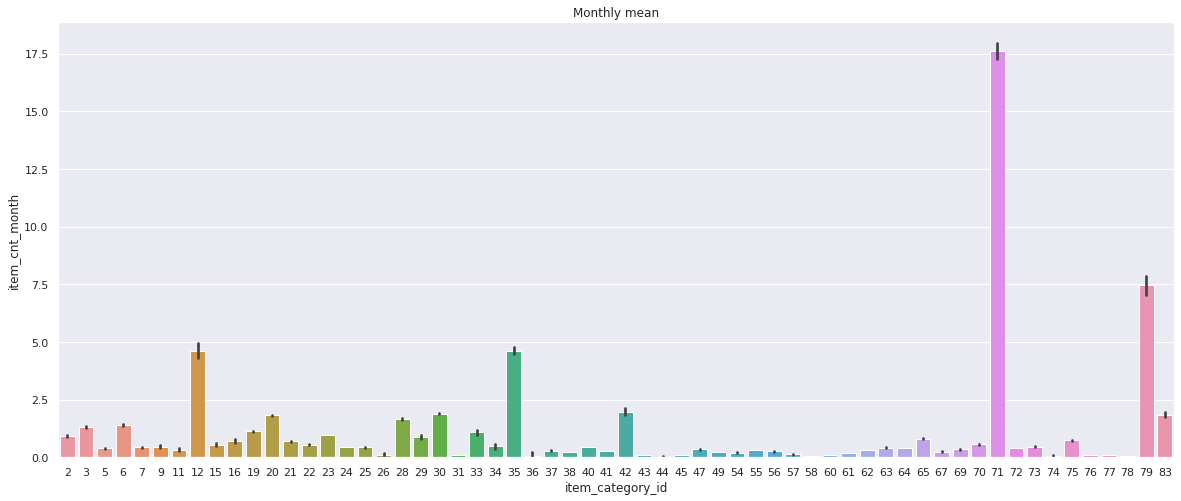

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x="item_category_id", y="item_cnt_month", data=all_data).set_title("Monthly mean")
plt.show()

# few of the categories seems to hold most of the sell count.

In [ ]:
#all_data["item_cnt_month"].loc[all_data["item_category_id"] == 71].tolist()

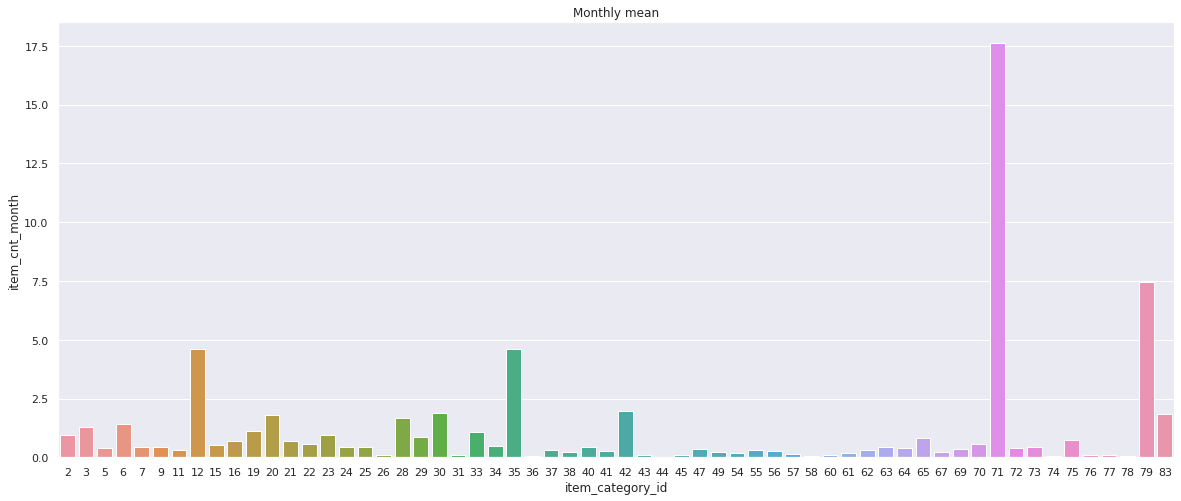

In [ ]:
gp_category_mean = all_data.groupby(['item_category_id'], as_index=False)['item_cnt_month'].mean()
plt.figure(figsize=(20,8))
sns.barplot(x="item_category_id", y="item_cnt_month", data=gp_category_mean).set_title("Monthly mean")
plt.show()

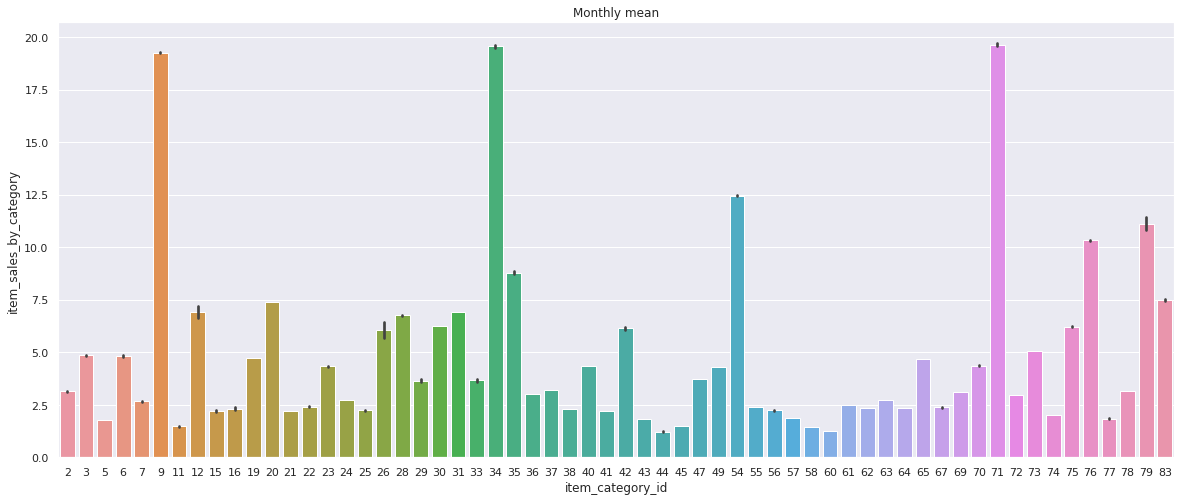

In [ ]:
#gb = final_train_target.groupby(["item_category_id",'date_block_num']).item_cnt_month.agg(['mean']).rename(columns={'mean': 'item_sales_by_category'}).reset_index()
# its 
plt.figure(figsize=(20,8))
sns.barplot(x="item_category_id", y="item_sales_by_category", data=all_data).set_title("Monthly mean")
plt.show()


In [ ]:
train_monthly = train.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)
train_monthly.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
3792,01.01.2013,0,28,16135,249.0,1.0,65
8044,01.01.2013,0,7,8012,299.0,1.0,55
15334,01.01.2013,0,37,2703,599.0,1.0,30
8033,01.01.2013,0,7,10786,249.0,1.0,55
6745,01.01.2013,0,15,2308,799.0,1.0,30
...,...,...,...,...,...,...,...
751780,31.12.2014,23,21,15275,1599.0,1.0,63
731211,31.12.2014,23,19,5634,3290.0,1.0,2
731220,31.12.2014,23,19,5900,1199.0,1.0,30
731469,31.12.2014,23,19,15279,1099.0,1.0,63


In [ ]:
gb = train.groupby(['shop_id', 'item_id', 'date_block_num']).item_price.agg(['mean']).rename(columns={'mean': 'shop_item_price'}).reset_index()

plt.figure(figsize=(20,8))
sns.lineplot(x="item_id", y="item_cnt_month", data=all_data).set_title("Monthly mean")
plt.show()



## lagged features

In [ ]:
all_data = train

In [ ]:
train.head()

,item_id,item_category_id,shop_id,date_block_num,item_cnt_month,shop_item_price,it_price,item_sales,item_sales_by_category
0,0,40,2,20,0,0.0,58.0,1.0,3.744558
1,0,40,3,20,0,0.0,58.0,1.0,3.744558
2,0,40,4,20,0,0.0,58.0,1.0,3.744558
3,0,40,5,20,0,0.0,58.0,1.0,3.744558
4,0,40,6,20,0,0.0,58.0,1.0,3.744558


In [ ]:
from sklearn.model_selection import KFold
from tqdm import tqdm

# # Add item/shop pair mean-encodings -----------------------------------------

# # For Trainset

Target = 'item_cnt_month'
global_mean =  train[Target].mean()
y_tr = train[Target].values

mean_encoded_col = ['item_category_id'] #'shop_id', 'item_id'

SEED = 0

for col in tqdm(mean_encoded_col):

  col_tr = train[[col] + [Target]]
  corrcoefs = pd.DataFrame(columns = ['Cor'])

# # 3.1.1 Mean encodings - KFold scheme

  kf = KFold(n_splits = 5, shuffle = False, random_state = SEED)
  col_tr[col + '_cnt_month_mean_Kfold'] = global_mean

  for tr_ind, val_ind in kf.split(col_tr):

    X_tr, X_val = col_tr.iloc[tr_ind], col_tr.iloc[val_ind]
    means = X_val[col].map(X_tr.groupby(col)[Target].mean())
    X_val[col + '_cnt_month_mean_Kfold'] = means
    col_tr.iloc[val_ind] = X_val
    # X_val.head()

  col_tr.fillna(global_mean, inplace = True)
  corrcoefs.loc[col + '_cnt_month_mean_Kfold'] = np.corrcoef(y_tr, col_tr[col + '_cnt_month_mean_Kfold'])[0][1]
  train = pd.concat([train, col_tr[corrcoefs['Cor'].idxmax()]], axis = 1)
  print(corrcoefs.sort_values('Cor'))


#Le mean encoding représente une probabilité de target pour chaque valeur de la variable encodée.
#D’où l’utilisation de l’ensemble des données de la variable id_catégorie pour l’encodage. 
#Si j’ajoute une condition dans le mean encoding comme le mois mon test à un mauvais score. 



  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

                                            Cor
item_category_id_cnt_month_mean_Kfold  0.171661


In [ ]:
#pd.value_counts(all_data["item_category_id_cnt_month_mean_Kfold"].loc[all_data['item_category_id'] == 12])


4.330411    2386
0.857502    1734
0.000000     462
Name: item_category_id_cnt_month_mean_Kfold, dtype: int64

In [ ]:
test['date_block_num'] = 34
all_data = pd.concat([train, test], axis = 0)
all_data = all_data.drop(columns = ['ID'])

In [ ]:
all_data.head()

,item_id,item_category_id,shop_id,date_block_num,item_cnt_month,shop_item_price,it_price,item_sales,item_sales_by_category,item_category_id_cnt_month_mean_Kfold
0,0,40,2,20,0.0,0.0,58.0,1.0,3.744558,0.242651
1,0,40,3,20,0.0,0.0,58.0,1.0,3.744558,0.242651
2,0,40,4,20,0.0,0.0,58.0,1.0,3.744558,0.242651
3,0,40,5,20,0.0,0.0,58.0,1.0,3.744558,0.242651
4,0,40,6,20,0.0,0.0,58.0,1.0,3.744558,0.242651


In [ ]:
from tqdm import tqdm

# # Creating item/shop pair lags lag-based features

index_cols = ['shop_id', 'item_id',  'date_block_num', 'item_category_id'] #"item_category_id_cnt_month_mean_Kfold"
cols_to_rename = list(all_data.columns.difference(index_cols))
print(cols_to_rename)
shift_range = [1, 2, 3, 4, 12]

for month_shift in tqdm(shift_range):

  train_shift = all_data[index_cols + cols_to_rename].copy()
  train_shift['date_block_num'] = train_shift['date_block_num'] + month_shift
  foo = lambda x: '{}_lag_{}'.format(x, month_shift) if x in cols_to_rename else x
  train_shift = train_shift.rename(columns=foo)
  all_data = pd.merge(all_data, train_shift, on=index_cols, how='left').fillna(0)

del train_shift
gc.collect()


all_data = all_data[all_data['date_block_num'] >= 12] # Don't use old data from year 2013
lag_cols = [col for col in all_data.columns if col[-1] in [str(item) for item in shift_range]]
all_data = downcast_dtypes(all_data)

  0%|          | 0/5 [00:00<?, ?it/s]

['it_price', 'item_category_id_cnt_month_mean_Kfold', 'item_cnt_month', 'item_sales', 'item_sales_by_category', 'shop_item_price']


100%|██████████| 5/5 [01:08<00:00, 13.65s/it]


## Feature generation 

In [ ]:
final_train["revenue"] = final_train["item_price"]*final_train["item_cnt_day"]
final_train.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day,ID,shop_name,revenue
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20.0,54,58.0,1.0,0.0,"Химки ТЦ ""Мега""",58.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19.0,54,58.0,1.0,0.0,"Химки ТЦ ""Мега""",58.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22.0,54,58.0,1.0,0.0,"Химки ТЦ ""Мега""",58.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18.0,54,100.0,1.0,0.0,"Химки ТЦ ""Мега""",100.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19.0,54,58.0,1.0,0.0,"Химки ТЦ ""Мега""",58.0


## Remove outliers

In [ ]:
final_train = final_train[final_train.item_price<100000]
final_train = final_train[final_train.item_cnt_day<1001]

In [ ]:
median = final_train[(final_train.shop_id==32)&(final_train.item_id==2973)&(final_train.date_block_num==4)&(final_train.item_price>0)].item_price.median()
final_train.loc[final_train.item_price<0, 'item_price'] = median

In [ ]:
# Якутск Орджоникидзе, 56
final_train.loc[final_train.shop_id == 0, 'shop_id'] = 57

# Якутск ТЦ "Центральный"
final_train.loc[final_train.shop_id == 1, 'shop_id'] = 58

# Жуковский ул. Чкалова 39м²
final_train.loc[final_train.shop_id == 10, 'shop_id'] = 11


## item_cat_id mean encoding

In [ ]:
#mean encoding for item_category

from sklearn.model_selection import KFold

train_new = pd.DataFrame()
y = all_data["target"]
kf = KFold(n_splits=5, shuffle=False, random_state=123)
for spt, spv in kf.split(y) :
    train, val = all_data.iloc[spt], all_data.iloc[spv]
    # target coding of valid dataset depends on train dataset(with loops several parts of the val df mean encoding)
    val["item_category_enc"] = val["item_category_id"].map(train.groupby("item_category_id").target.mean())
    # copy target encoding back to all_data 
    rowIndex = val.index
    all_data.loc[rowIndex, "item_category_enc"] = val["item_category_enc"]
    
prior = all_data["target"].mean()
all_data.fillna(prior,inplace=True)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
all_data[["item_category_id","item_category_enc", "shop_id", "item_id"]]

,item_category_id,item_category_enc,shop_id,item_id
0,40,0.205622,54,0
1,40,0.205622,56,0
2,40,0.205622,44,0
3,40,0.205622,25,0
4,40,0.205622,31,0
...,...,...,...,...
11128045,36,0.327839,48,13091
11128046,36,0.327839,49,13091
11128047,36,0.327839,55,13091
11128048,36,0.327839,34,13091


## Clipping target [0,20] + Lagging on train dataset

In [ ]:
all_data["item_cnt_month"].clip(0, 20, inplace=True)
final_df = all_data
#all_data["target_shop"].clip(0, 20, inplace=True)
#all_data["target_item"].clip(0, 20, inplace=True)
#all_data["target_category"].clip(0, 20, inplace=True)
#all_data["target_item_price"].clip(0, 20, inplace=True)
#all_data.columns

In [ ]:
all_data.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_cnt_month',
       'item_category_id', 'item_category_id_cnt_month_mean_Kfold'],
      dtype='object')

In [ ]:
#fit on all train dataset. 
#lags from [1, 2, 3, 4, 5, 12] months ago.

index_cols = ['shop_id', 'item_id', 'date_block_num']
cols_to_rename = ["target","shop_item_price","item_sales"]
# List of columns that we will use to create lags
half_data1 = all_data[['shop_id', 'item_id', 'date_block_num',"target","shop_item_price","item_sales"]]


shift_range = [1, 2, 3, 4, 5, 12]

for month_shift in tqdm_notebook(shift_range):
    train_shift = all_data[index_cols + cols_to_rename].copy()
    
    train_shift['date_block_num'] = train_shift['date_block_num'] + month_shift
    
    foo = lambda x: '{}_lag_{}'.format(x, month_shift) if x in cols_to_rename else x
    train_shift = train_shift.rename(columns=foo)

    half_data1 = pd.merge(half_data1, train_shift, on=index_cols, how='left').fillna(0)

del train_shift

half_data1 = half_data1[half_data1['date_block_num'] >= 12]

half_data1 = downcast_dtypes(half_data1)
gc.collect();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


In [ ]:
#fit on all train dataset. 
#lags from [1, 2, 3, 4, 5, 12] months ago.

index_cols = ['shop_id', 'item_id', 'date_block_num']

cols_to_rename = ["target_category", "it_price"]
half_data2 = all_data[['shop_id', 'item_id', 'date_block_num','item_category_id', 'item_category_enc',"target_category", "it_price"]]

shift_range = [1, 2, 3, 4, 5, 12]

for month_shift in tqdm_notebook(shift_range):
    train_shift = all_data[index_cols + cols_to_rename].copy()
    
    train_shift['date_block_num'] = train_shift['date_block_num'] + month_shift
    
    foo = lambda x: '{}_lag_{}'.format(x, month_shift) if x in cols_to_rename else x
    train_shift = train_shift.rename(columns=foo)

    half_data2 = pd.merge(half_data2, train_shift, on=index_cols, how='left').fillna(0)

del train_shift

half_data2 = half_data2[half_data2['date_block_num'] >= 12]
half_data2 = half_data2.drop(index_cols, axis=1)

half_data2 = downcast_dtypes(half_data2)
gc.collect();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
final_df = pd.concat([half_data1, half_data2], axis=1)
final_df.head()
#final_df.columns #revenue, revenue per shop, revenue per items and revenue per cat not presents. 

,shop_id,item_id,date_block_num,target,shop_item_price,item_sales,target_lag_1,shop_item_price_lag_1,item_sales_lag_1,target_lag_2,shop_item_price_lag_2,item_sales_lag_2,target_lag_3,shop_item_price_lag_3,item_sales_lag_3,target_lag_4,shop_item_price_lag_4,item_sales_lag_4,target_lag_5,shop_item_price_lag_5,item_sales_lag_5,target_lag_12,shop_item_price_lag_12,item_sales_lag_12,item_category_id,item_category_enc,target_category,it_price,target_category_lag_1,it_price_lag_1,target_category_lag_2,it_price_lag_2,target_category_lag_3,it_price_lag_3,target_category_lag_4,it_price_lag_4,target_category_lag_5,it_price_lag_5,target_category_lag_12,it_price_lag_12
0,54,0,20,1.0,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.205622,3.930126,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56,0,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.205622,3.930126,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44,0,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.205622,3.930126,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,0,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.205622,3.930126,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,0,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.205622,3.930126,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Predict on original train dataset (with lags) :  linearreg and LGBM

In [ ]:
# Save `date_block_num`, as we can't use them as features, but will need them to split the dataset into parts 
dates = final_df['date_block_num']

last_block = dates.max()
print('Test `date_block_num` is %d' % last_block)

Test `date_block_num` is 33


In [ ]:
# List of all lagged features
fit_cols = [col for col in final_df.columns if col[-1] in [str(item) for item in shift_range]] 
# We will drop these at fitting stage
to_drop_cols = list(set(list(final_df.columns)) - (set(fit_cols)|set(index_cols))) + ['date_block_num']

dates_train = dates[dates <  last_block]
dates_test  = dates[dates == last_block]

X_train = final_df.loc[dates <  last_block].drop(to_drop_cols, axis=1)
X_test =  final_df.loc[dates == last_block].drop(to_drop_cols, axis=1)

y_train = final_df.loc[dates <  last_block, 'target'].values
y_test =  final_df.loc[dates == last_block, 'target'].values

In [ ]:
#columns_list = ['shop_id', 'item_id', 'target', 'shop_item_price', 'item_sales', 'target_category', 'it_price'] #here keep data block num for predictions. 
columns_list = ['date_block_num', 'item_cnt_month', 'shop_item_price', 'it_price', 'item_sales', "item_sales_by_category"] 
#columns_list1 = ['item_cnt_month', 'shop_item_price', 'it_price', 'item_sales', "item_category_id_cnt_month_mean_Kfold"]
all_data.columns


Index(['item_id', 'item_category_id', 'shop_id', 'date_block_num',
       'item_cnt_month', 'shop_item_price', 'it_price', 'item_sales',
       'item_sales_by_category', 'item_category_id_cnt_month_mean_Kfold',
       'it_price_lag_1', 'item_category_id_cnt_month_mean_Kfold_lag_1',
       'item_cnt_month_lag_1', 'item_sales_lag_1',
       'item_sales_by_category_lag_1', 'shop_item_price_lag_1',
       'it_price_lag_2', 'item_category_id_cnt_month_mean_Kfold_lag_2',
       'item_cnt_month_lag_2', 'item_sales_lag_2',
       'item_sales_by_category_lag_2', 'shop_item_price_lag_2',
       'it_price_lag_3', 'item_category_id_cnt_month_mean_Kfold_lag_3',
       'item_cnt_month_lag_3', 'item_sales_lag_3',
       'item_sales_by_category_lag_3', 'shop_item_price_lag_3',
       'it_price_lag_4', 'item_category_id_cnt_month_mean_Kfold_lag_4',
       'item_cnt_month_lag_4', 'item_sales_lag_4',
       'item_sales_by_category_lag_4', 'shop_item_price_lag_4',
       'it_price_lag_12', 'item_category_

In [ ]:
# à partir du lag dans les x_train, x_val et x_test sur cnt_month_lag on préditle cnt_month à venir. 

train_df_mask = all_data["date_block_num"] < 33
x_train = all_data[train_df_mask]
x_train = x_train[x_train.columns.difference(columns_list)]
y_train = all_data["item_cnt_month"][train_df_mask]


val_df_mask = all_data["date_block_num"] == 33
x_val = all_data[val_df_mask]
x_val = x_val[x_val.columns.difference(columns_list)]
y_val = all_data["item_cnt_month"][val_df_mask]

test_df_mask = all_data["date_block_num"] == 34
x_test = all_data[test_df_mask]
x_test = x_test[x_test.columns.difference(columns_list)]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)

(6186922, 34)
(6186922,)
(238172, 34)
(238172,)
(214200, 34)


In [ ]:
lr = LinearRegression()
lr.fit(X_train.values, y_train)
pred_lr = lr.predict(X_test.values)

print('Test R-squared for linreg is %f' % r2_score(y_test, pred_lr))

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error as RMSE 

lgb_params = {
               'feature_fraction': 0.75,
               'metric': 'rmse',
               'nthread':1, 
               'min_data_in_leaf': 2**7, 
               'bagging_fraction': 0.75, 
               'learning_rate': 0.03, 
               'objective': 'mse', 
               'bagging_seed': 2**7, 
               'num_leaves': 2**7,
               'bagging_freq':1,
               'verbose':0 
              }

model = lgb.train(lgb_params, lgb.Dataset(x_train, label=y_train), 100)
model.scoring(x_val, y_val, x_train, y_train)

print('Test RMSE for LightGBM is %f' % RMSE(y_val, pred_lgb))
#print('Test R-squared for LightGBM is %f' % r2_score(y_test, pred_lgb))

In [ ]:
import lightgbm as lgb

lgb_train=lgb.Dataset(x_train,y_train)
lgb_val=lgb.Dataset(x_val,y_val)
model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_val])


[1]	valid_0's rmse: 1.12563
[2]	valid_0's rmse: 1.11469
[3]	valid_0's rmse: 1.10358
[4]	valid_0's rmse: 1.09342
[5]	valid_0's rmse: 1.0838
[6]	valid_0's rmse: 1.07461
[7]	valid_0's rmse: 1.06589
[8]	valid_0's rmse: 1.05767
[9]	valid_0's rmse: 1.04965
[10]	valid_0's rmse: 1.04207
[11]	valid_0's rmse: 1.03472
[12]	valid_0's rmse: 1.02809
[13]	valid_0's rmse: 1.022
[14]	valid_0's rmse: 1.0167
[15]	valid_0's rmse: 1.01112
[16]	valid_0's rmse: 1.00589
[17]	valid_0's rmse: 1.00106
[18]	valid_0's rmse: 0.996159
[19]	valid_0's rmse: 0.991939
[20]	valid_0's rmse: 0.988103
[21]	valid_0's rmse: 0.984002
[22]	valid_0's rmse: 0.980157
[23]	valid_0's rmse: 0.976725
[24]	valid_0's rmse: 0.973642
[25]	valid_0's rmse: 0.970985
[26]	valid_0's rmse: 0.968525
[27]	valid_0's rmse: 0.966222
[28]	valid_0's rmse: 0.963821
[29]	valid_0's rmse: 0.961499
[30]	valid_0's rmse: 0.959774
[31]	valid_0's rmse: 0.958001
[32]	valid_0's rmse: 0.95627
[33]	valid_0's rmse: 0.955058
[34]	valid_0's rmse: 0.953479
[35]	valid_

In [ ]:
#pred_lgb = model.predict(x_test).clip(0,20)
pred_lgb = model.predict(x_test)

In [ ]:
# Create the submission file and submit
preds = pd.DataFrame(pred_lgb, columns=['item_cnt_month'])
preds.to_csv('submission.csv',index_label='ID')


In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Complete solution 
## https://www.kaggle.com/c/competitive-data-science-predict-future-sales/discussion/74835


### Creating date features

In [ ]:
# Creating date features

train['date'] = pd.to_datetime(train['date'], format = '%d.%m.%Y')
dates_train = train[['date', 'date_block_num']].drop_duplicates()

In [ ]:
dates_test = dates_train[dates_train['date_block_num'] == 34-12]


In [ ]:
dates_test['date_block_num'] = 34

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dates_test['date'] = dates_test['date'] + pd.DateOffset(years=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dates_all = pd.concat([dates_train, dates_test])

In [ ]:
dates_all['dow'] = dates_all['date'].dt.dayofweek
dates_all['year'] = dates_all['date'].dt.year
dates_all['month'] = dates_all['date'].dt.month

In [ ]:
dates_all = pd.get_dummies(dates_all, columns=['dow'])

In [ ]:
dow_col = ['dow_' + str(x) for x in range(7)]

In [ ]:
date_features = dates_all.groupby(['year', 'month', 'date_block_num'])[dow_col].agg('sum').reset_index()
date_features.head()

,year,month,date_block_num,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,2013,1,0,4,5,5,5,4,4,4
1,2013,2,1,4,4,4,4,4,4,4
2,2013,3,2,4,4,4,4,5,5,5
3,2013,4,3,5,5,4,4,4,4,4
4,2013,5,4,4,4,5,5,5,4,4


In [ ]:
date_features['days_of_month'] = date_features[dow_col].sum(axis=1)
date_features.head()

,year,month,date_block_num,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,days_of_month
0,2013,1,0,4,5,5,5,4,4,4,31
1,2013,2,1,4,4,4,4,4,4,4,28
2,2013,3,2,4,4,4,4,5,5,5,31
3,2013,4,3,5,5,4,4,4,4,4,30
4,2013,5,4,4,4,5,5,5,4,4,31


In [ ]:
date_features['year'] = date_features['year'] - 2013

In [ ]:
date_features = date_features[['month', 'year', 'days_of_month', 'date_block_num']]
date_features.head()

,month,year,days_of_month,date_block_num
0,1,0,31,0
1,2,0,28,1
2,3,0,31,2
3,4,0,30,3
4,5,0,31,4


In [ ]:
test['date_block_num'] = 34
all_data = pd.concat([train, test], axis = 0)
all_data = all_data.drop(columns = ['ID'])

In [ ]:
all_data = all_data.merge(date_features, on = 'date_block_num', how = 'left')
all_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,days_of_month
0,2013-01-02,0,59,22154,999.00,1.0,1,0,31
1,2013-01-03,0,25,2552,899.00,1.0,1,0,31
2,2013-01-05,0,25,2552,899.00,-1.0,1,0,31
3,2013-01-06,0,25,2554,1709.05,1.0,1,0,31
4,2013-01-15,0,25,2555,1099.00,1.0,1,0,31


In [ ]:
index_cols = ['shop_id', 'item_id', 'date_block_num']
date_columns = date_features.columns.difference(set(index_cols))
date_columns

Index(['days_of_month', 'month', 'year'], dtype='object')

In [ ]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in train['date_block_num'].unique():
    cur_shops = train.loc[train['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = train.loc[train['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

# Turn the grid into a dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

# Groupby data to get shop-item-month aggregates
gb = train.groupby(index_cols).item_cnt_day.agg(['sum']).rename(columns={'sum': 'target'}).reset_index()

# Join it to the grid
all_data = pd.merge(grid, gb, how='left', on=index_cols).fillna(0)

all_data = downcast_dtypes(all_data)
del grid, gb 
gc.collect();